# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$


In [1]:
from sympy import *


In [113]:
y = Function("y")
z = Function("z")
w = Function("w")
g = Function("g")
x, x0 = symbols ("x, x_0")

In [5]:
y_F = Eq(y(x), sin(x))
y_F

Eq(y(x), sin(x))

In [7]:
z_F = Eq(z(x), cos(x))
z_F

Eq(z(x), cos(x))

In [11]:
w_F = Eq(w(x), 1/(cos(x)+sin(2*x)))
w_F

Eq(w(x), 1/(sin(2*x) + cos(x)))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [55]:
g_F = Eq(g(x), y_F.rhs*z_F.rhs)
g_F

Eq(g(x), sin(x)*cos(x))

In [18]:
Derivada = Eq(Derivative(g(x),x), Derivative(y_F.rhs*z_F.rhs,x))
simplify(Derivada)

Eq(Derivative(g(x), x), cos(2*x))

(c) Grafica $w(x)$ en el rango $[0,1]$



In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
w_F

Eq(w(x), 1/(sin(2*x) + cos(x)))

In [36]:
x_values = np.linspace(0,1)
w_funct = lambdify(x, w_F.rhs, modules=['numpy'])
y_values = w_funct(x_values)

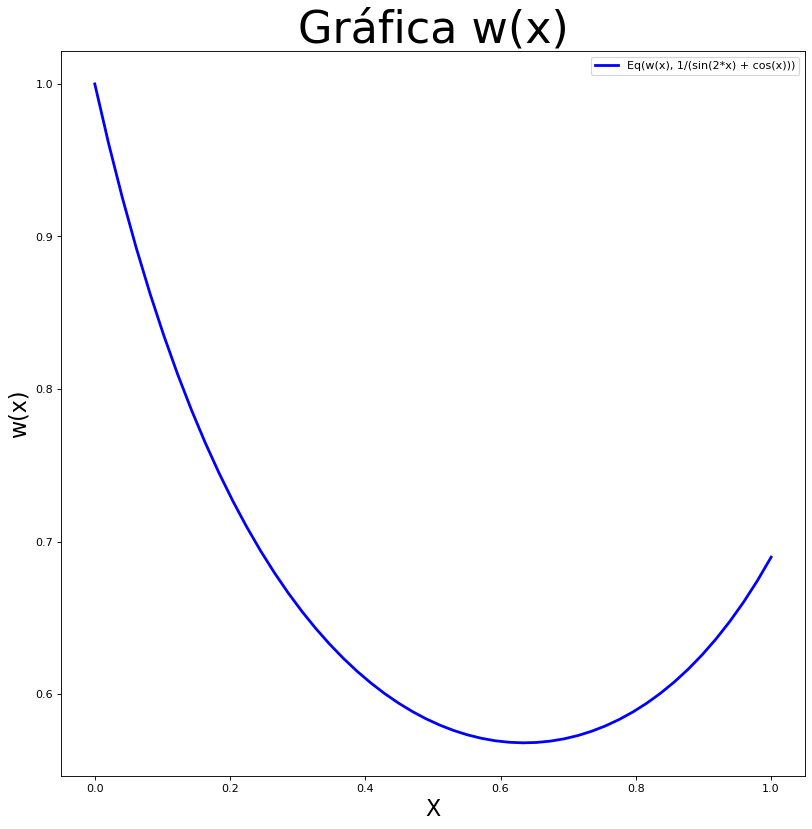

In [105]:
plt.figure(figsize=(12, 12), dpi=80)
plt.plot(x_values, y_values, linewidth=2.5, linestyle="-",color="blue", label = w_F)
plt.xlabel('X', fontsize=20)
plt.ylabel('w(x)', fontsize=20)
plt.title("Gráfica w(x)", fontsize=40)
plt.legend(loc='best')



(d) Integra de manera indefinida $g(x)$ y luego evalúala desde $0$ a $1$.



In [59]:
g_int = Eq (integrate(g_F.lhs, x), integrate(g_F.rhs,x))
simplify(g_int)

Eq(Integral(g(x), x), sin(x)**2/2)

In [73]:
g_int_eval = Eq (integrate(g_F.lhs,(x,0,1)), g_int.rhs.subs(x,1) - g_int.rhs.subs(x,0))
simplify(g_int_eval)

Eq(Integral(g(x), (x, 0, 1)), sin(1)**2/2)



(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?



In [91]:
Eq(Limit(y_F.lhs, x, 0) ,limit(y_F.rhs, x, 0))

Eq(Limit(y(x), x, 0), 0)

In [92]:
Eq(Limit(z_F.lhs, x, 0),limit(z_F.rhs, x, 0))

Eq(Limit(z(x), x, 0), 1)

In [93]:
Eq(Limit(g_F.lhs, x, 0),limit(g_F.rhs, x, 0))

Eq(Limit(g(x), x, 0), 0)

In [94]:
Eq(Limit(w_F.lhs, x, 0),limit(w_F.rhs, x, 0))

Eq(Limit(w(x), x, 0), 1)



(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [115]:
y_Tay = y_F.rhs.subs(x,x0) + diff(y_F.rhs).subs(x,x0)*(x-x0) + (diff(diff(y_F.rhs)).subs(x,x0))/2*(x-x0)**2 + diff(diff(diff(y_F.rhs))).subs(x,x0)/6*(x-x0)**3
y_Tay

-(x - x_0)**3*cos(x_0)/6 - (x - x_0)**2*sin(x_0)/2 + (x - x_0)*cos(x_0) + sin(x_0)

In [116]:
z_Tay = z_F.rhs.subs(x,x0) + diff(z_F.rhs).subs(x,x0)*(x-x0) + (diff(diff(z_F.rhs)).subs(x,x0))/2*(x-x0)**2 + diff(diff(diff(z_F.rhs))).subs(x,x0)/6*(x-x0)**3
z_Tay

(x - x_0)**3*sin(x_0)/6 - (x - x_0)**2*cos(x_0)/2 - (x - x_0)*sin(x_0) + cos(x_0)

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [206]:
def atractor(estado, tiempo):
    g0= -estado[1]-estado[2]
    g1= estado[0] + .13*estado[1]
    g2= .2 + estado[2]*(estado[0]-6.5)
    return np.array([g0,g1,g2])

In [207]:
N = 1000
time = np.linspace(0,100,N)
dt = 100/float(N-1)
#Tomamos 100 como el tiempo de la simulacion

In [208]:
w = np.zeros([N,3])
w[0,0] = 0 #x(0)=0
w[0,1] = 0 #y(0)=0
w[0,2] = 0 #z(0)=0
w

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [209]:
#w es la condicion inicial
#time es el tiempo en el que va
#dt es el tamaño del paso
#derivadas es atractor

def RK2(w, time, dt, derivadas):
    k0 = dt*derivadas(w, time)
    k1 = dt*derivadas(w + k0, time + dt)
    w_next = w + 0.5*(k0 + k1)
    
    return w_next

In [210]:
for i in range(N-1):
    w[i+1] = RK2(w[i], time[i], dt, atractor)
w

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00200300e-03,  0.00000000e+00,  1.35070005e-02],
       [-2.91111346e-03, -1.68623483e-04,  2.10815803e-02],
       ...,
       [ 1.55564717e+00,  6.83853572e+00,  2.09547702e+00],
       [ 7.00009482e-01,  7.04007878e+00,  1.28180975e+00],
       [-1.04859792e-01,  7.16112165e+00,  7.44607627e-01]])

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

In [213]:
xdata = [w[i,0] for i in range(N)]
ydata = [w[i,1] for i in range(N)]
zdata = [w[i,2] for i in range(N)]

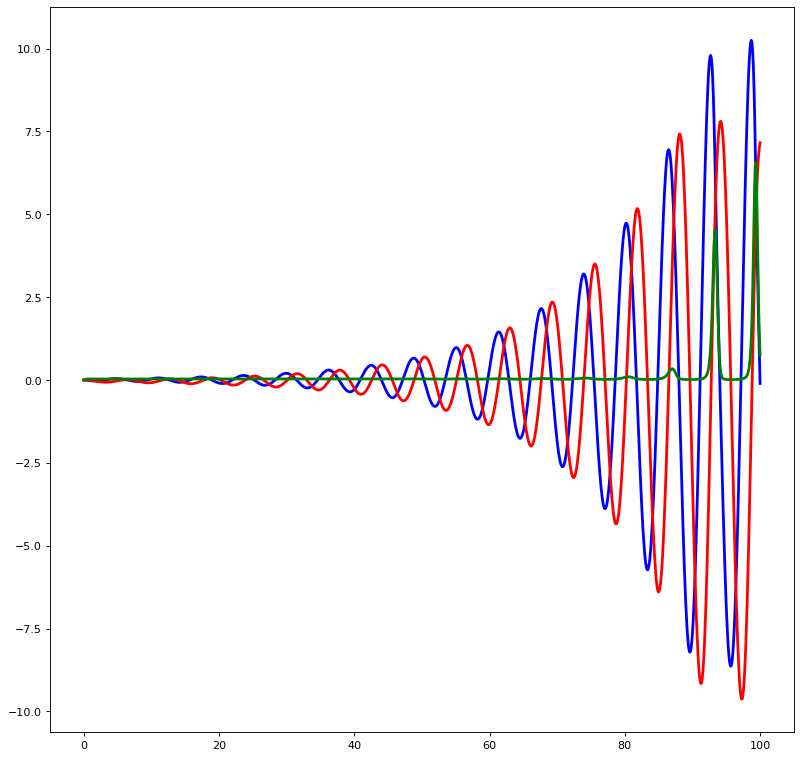

In [214]:
plt.figure(figsize=(12, 12), dpi=80)
plt.plot(time, xdata, linewidth=2.5, linestyle="-",color="blue", label = "x(t)")
plt.plot(time, ydata, linewidth=2.5, linestyle="-",color="red", label = "y(t)")
plt.plot(time, zdata, linewidth=2.5, linestyle="-",color="green", label = "z(t)")

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [215]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

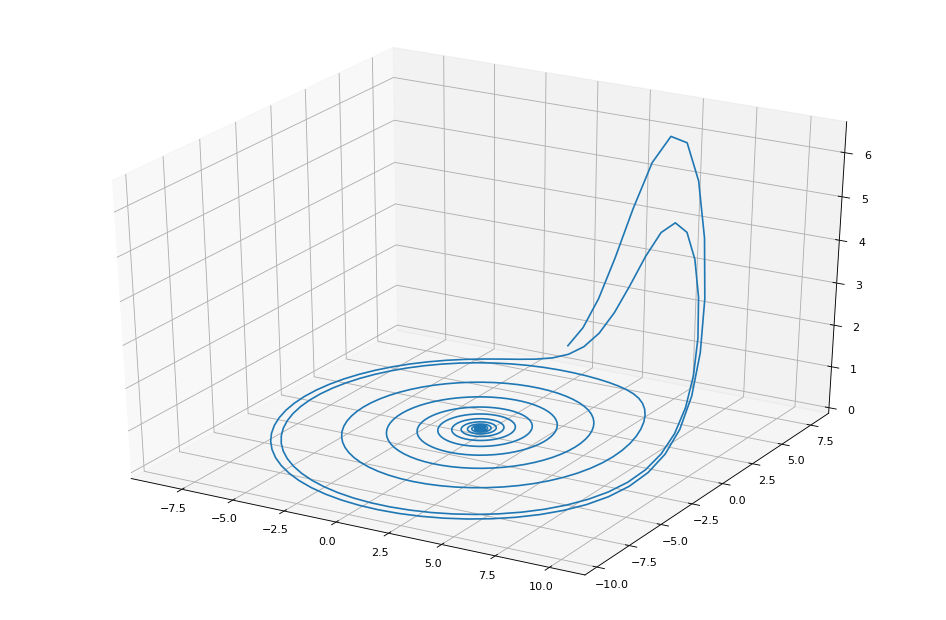

In [222]:
fig = plt.figure(figsize=(15, 10), dpi=80)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(xdata, ydata, zdata)